<a href="https://colab.research.google.com/github/amrlasyraf/DataProject/blob/main/GlobalPopulationTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4)

In [2]:
# Reading and observe the data

path = "/content/drive/MyDrive/Dataset/Global Population Trends(2016-2022).csv"
df = pd.read_csv(path)
df.head()

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,-,-,-,55,63.0,37.342,7.027,5.129,49.4,-
1,Afghanistan,2018,"36,686,784","9,353,296","27,333,488",56,63.0,36.927,6.981,5.002,47.8,3.0
2,Afghanistan,2019,"37,769,499","9,727,157","28,042,342",58,64.0,36.466,6.791,4.87,46.3,3.0
3,Afghanistan,2020,"38,972,230","10,142,913","28,829,317",60,63.0,36.051,7.113,4.75,44.8,3.0
4,Afghanistan,2021,"40,099,462","10,551,772","29,547,690",-,62.0,35.842,7.344,4.643,43.4,3.0


In [3]:
# See for misssing data

for col in df.columns:
  missing_pct = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, missing_pct))

Country - 0.0%
Year - 0.0%
Total Population - 0.0%
Urban Population - 0.0%
Rural Population - 0.0%
Population Density - 0.0%
Life Expectancy - 0.0%
Birth Rate - 0.0%
Death Rate - 0.0%
Fertility Rate - 0.0%
Infant Mortality Rate - 0.0%
Growth Rate - 0.0%


In [4]:
# Data types for the variables

df.dtypes

Country                   object
Year                       int64
Total Population          object
Urban Population          object
Rural Population          object
Population Density        object
Life Expectancy           object
Birth Rate               float64
Death Rate               float64
Fertility Rate            object
Infant Mortality Rate     object
Growth Rate               object
dtype: object

In [5]:
# Replace '-' with NaN and dropping the NaN

df.replace('-', np.nan, inplace=True)
df = df.dropna()

In [6]:
# Changing data type to float64

df['Total Population'] = pd.to_numeric(df['Total Population'].str.replace(',', ''), errors='coerce')
df['Urban Population'] = pd.to_numeric(df['Urban Population'].str.replace(',', ''), errors='coerce')
df['Rural Population'] = pd.to_numeric(df['Rural Population'].str.replace(',', ''), errors='coerce')
df['Population Density'] = pd.to_numeric(df['Population Density'], errors='coerce')
df['Life Expectancy'] = pd.to_numeric(df['Life Expectancy'], errors='coerce')
df['Birth Rate'] = pd.to_numeric(df['Birth Rate'], errors='coerce')
df['Death Rate'] = pd.to_numeric(df['Death Rate'], errors='coerce')
df['Fertility Rate'] = pd.to_numeric(df['Fertility Rate'], errors='coerce')
df['Infant Mortality Rate'] = pd.to_numeric(df['Infant Mortality Rate'], errors='coerce')
df['Growth Rate'] = pd.to_numeric(df['Growth Rate'], errors='coerce')
df.head()

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
1,Afghanistan,2018,36686784,9353296,27333488,56.0,63.0,36.927,6.981,5.002,47.8,3.0
2,Afghanistan,2019,37769499,9727157,28042342,58.0,64.0,36.466,6.791,4.870,46.3,3.0
3,Afghanistan,2020,38972230,10142913,28829317,60.0,63.0,36.051,7.113,4.750,44.8,3.0
6,Albania,2018,2866376,1728969,1137407,105.0,79.0,10.517,8.308,1.440,8.3,0.0
7,Albania,2019,2854191,1747593,1106598,104.0,79.0,10.343,8.480,1.414,8.4,0.0


In [7]:
# Reducing to one decimal place

df['Death Rate'] = df['Death Rate'].apply(lambda x: round(x, 1))
df['Fertility Rate'] = df['Fertility Rate'].apply(lambda x: round(x, 1))
df['Infact Mortality Rate'] = df['Infant Mortality Rate'].apply(lambda x: round(x, 1))

In [8]:
# Set Country as index

df.set_index('Country', inplace=True)

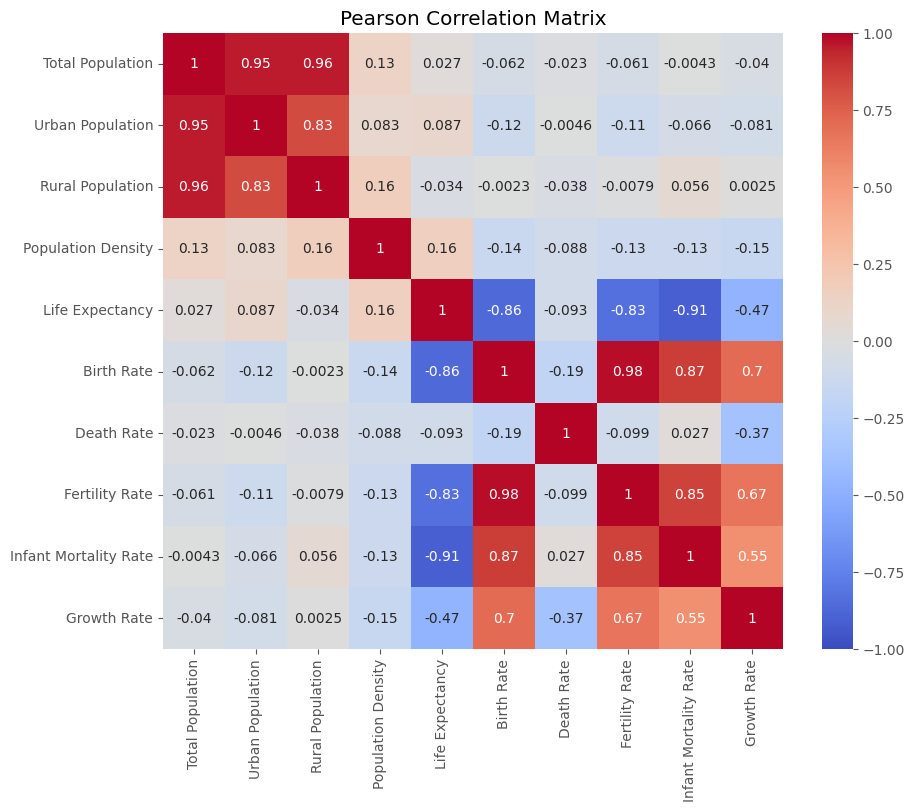

In [9]:
numerical_columns = df[['Total Population', 'Urban Population', 'Rural Population', 'Population Density', 'Life Expectancy', 'Birth Rate', 'Death Rate', 'Fertility Rate',
                       'Infant Mortality Rate', 'Growth Rate']]

# Calculate Pearson correlation matrix
pearson_corr_matrix = numerical_columns.corr()

# Calculate Spearman correlation matrix
spearman_corr_matrix = numerical_columns.corr(method='spearman')

# Plot Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

In [10]:
# Changing the Urban and Rural Population into percentage

df['Rural Percentage'] = (df['Rural Population'] / df['Total Population']) * 100
df['Urban Percentage'] = (df['Urban Population'] / df['Total Population']) * 100

In [11]:
# Comparison between India and China will be done as both of the countries have the largest populations

df_India = df.loc['India']
df_India.set_index('Year', inplace=True)

df_China = df.loc['China']
df_China.set_index('Year', inplace=True)

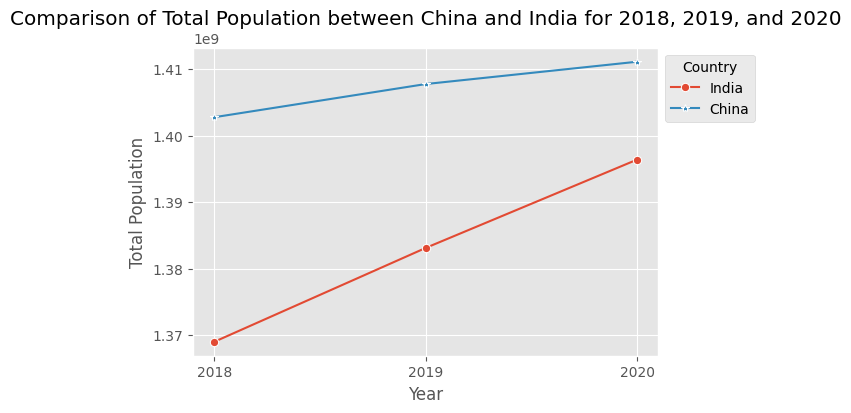

In [12]:
# Plotting scatterplot for Year vs Total Population

sns.lineplot(x=df_India.index.values, y=df_India['Total Population'], label='India', marker='o')
sns.lineplot(x=df_China.index.values, y=df_China['Total Population'], label='China', marker='*')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Comparison of Total Population between China and India for 2018, 2019, and 2020')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

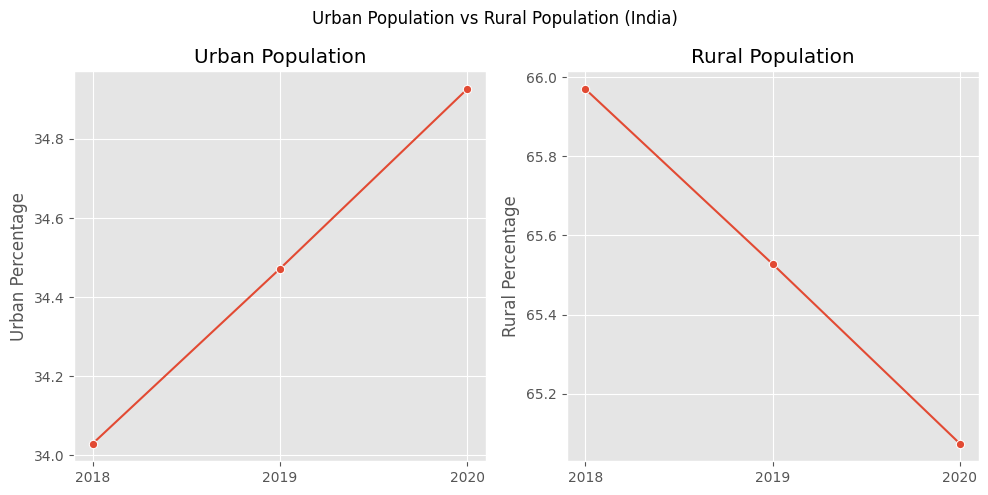

In [17]:
# Plotting scatterplot for Urban Population vs Rural Population in India

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.lineplot(x=df_India.index.values, y=df_India['Urban Percentage'], ax=axes[0], marker='o')
axes[0].set_title('Urban Population')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_India.index.values, y=df_India['Rural Percentage'], ax=axes[1], marker='o')
axes[1].set_title('Rural Population')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle('Urban Population vs Rural Population (India)')

plt.tight_layout()
plt.show()

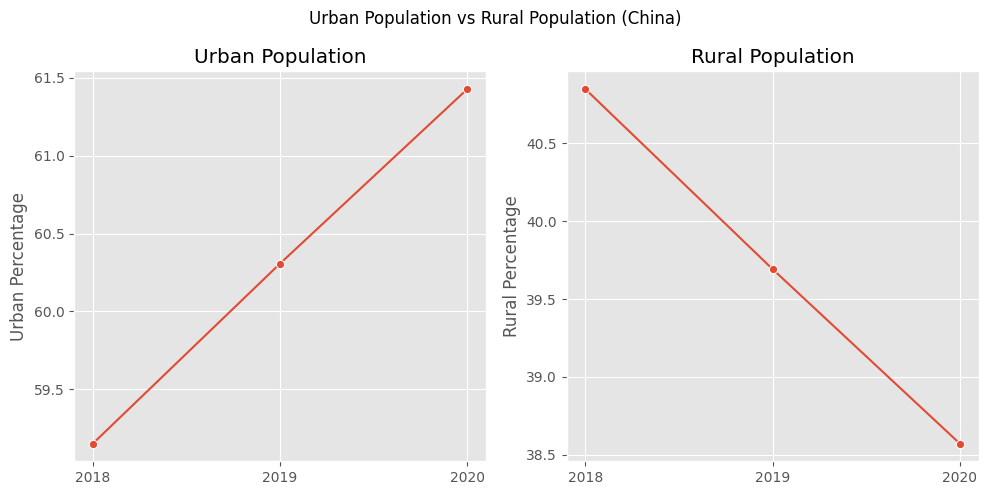

In [18]:
# Plotting scatterplot for Urban Population vs Rural Population in China

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.lineplot(x=df_China.index.values, y=df_China['Urban Percentage'], ax=axes[0], marker='o')
axes[0].set_title('Urban Population')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_China.index.values, y=df_China['Rural Percentage'], ax=axes[1], marker='o')
axes[1].set_title('Rural Population')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle('Urban Population vs Rural Population (China)')

plt.tight_layout()
plt.show()

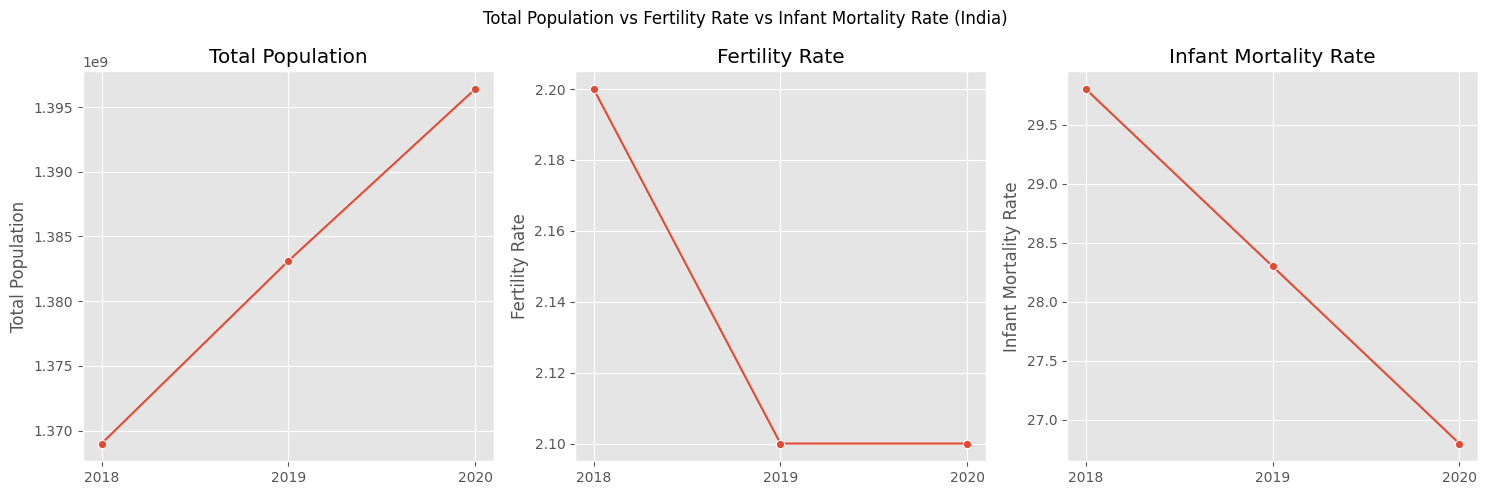

In [14]:
# Plotting scatterplot for Fertility Rate vs Infant Mortality Rate for India

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.lineplot(x=df_India.index.values, y=df_India['Total Population'], ax=axes[0], marker='o')
axes[0].set_title('Total Population')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_India.index.values, y=df_India['Fertility Rate'], ax=axes[1], marker='o')
axes[1].set_title('Fertility Rate')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_India.index.values, y=df_India['Infant Mortality Rate'], ax=axes[2], marker='o')
axes[2].set_title('Infant Mortality Rate')
axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle('Total Population vs Fertility Rate vs Infant Mortality Rate (India)')

plt.tight_layout()
plt.show()

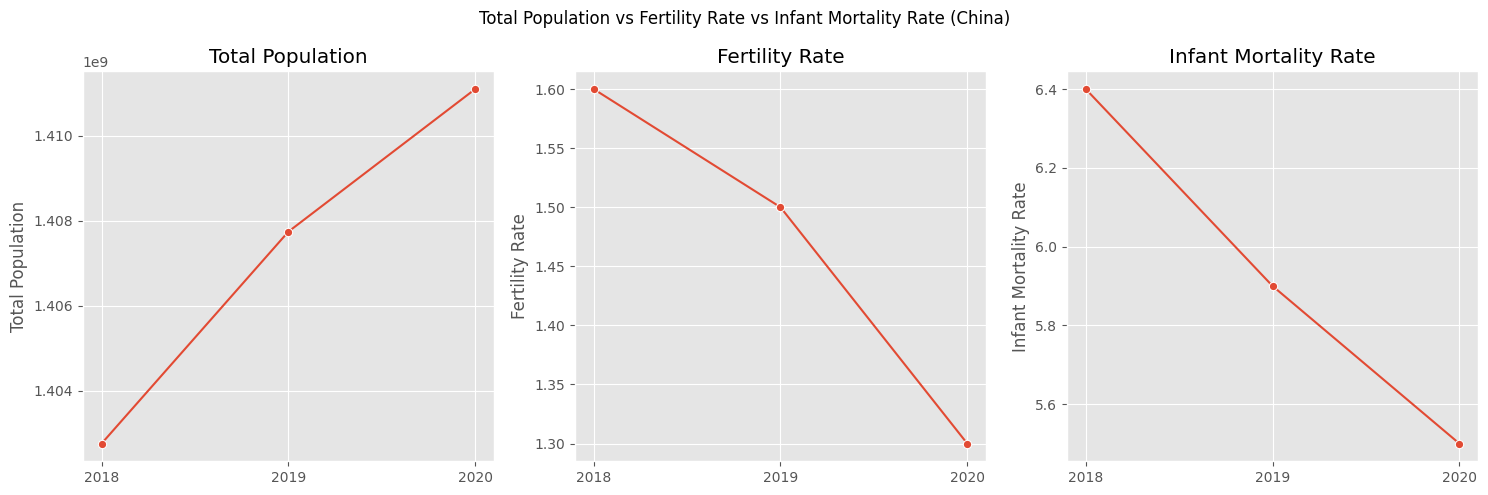

In [15]:
# Plotting scatterplot for Fertility Rate vs Infant Mortality Rate for China

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.lineplot(x=df_China.index.values, y=df_China['Total Population'], ax=axes[0], marker='o')
axes[0].set_title('Total Population')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_China.index.values, y=df_China['Fertility Rate'], ax=axes[1], marker='o')
axes[1].set_title('Fertility Rate')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.lineplot(x=df_China.index.values, y=df_China['Infant Mortality Rate'], ax=axes[2], marker='o')
axes[2].set_title('Infant Mortality Rate')
axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle('Total Population vs Fertility Rate vs Infant Mortality Rate (China)')

plt.tight_layout()
plt.show()